## 1.Importing different libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Retrieve the data

In [2]:
df=pd.read_csv('SQL - Retail Sales Analysis_utf .csv')

## 3. Data Preprocessing

In [3]:
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [4]:
df.tail()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
1995,1857,2022-11-09,12:15:00,109,Male,60.0,Electronics,2.0,25.0,7.5,50.0
1996,211,2022-09-12,14:02:00,54,Male,42.0,Beauty,3.0,500.0,235.0,1500.0
1997,650,2023-10-08,12:41:00,98,Male,55.0,Electronics,1.0,30.0,15.0,30.0
1998,1211,2023-11-22,14:59:00,82,Male,42.0,Beauty,3.0,500.0,235.0,1500.0
1999,1650,2022-09-23,16:24:00,89,Male,55.0,Electronics,1.0,30.0,10.8,30.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  2000 non-null   int64  
 1   sale_date        2000 non-null   object 
 2   sale_time        2000 non-null   object 
 3   customer_id      2000 non-null   int64  
 4   gender           2000 non-null   object 
 5   age              1990 non-null   float64
 6   category         2000 non-null   object 
 7   quantiy          1997 non-null   float64
 8   price_per_unit   1997 non-null   float64
 9   cogs             1997 non-null   float64
 10  total_sale       1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB


### 3.1 *Handling Null Values*

In [6]:
df.isna().sum()

transactions_id     0
sale_date           0
sale_time           0
customer_id         0
gender              0
age                10
category            0
quantiy             3
price_per_unit      3
cogs                3
total_sale          3
dtype: int64

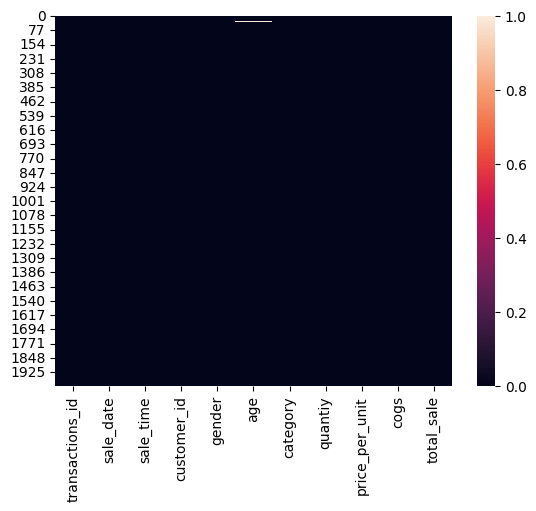

In [7]:
sns.heatmap(df.isna())
plt.show()

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  1987 non-null   int64  
 1   sale_date        1987 non-null   object 
 2   sale_time        1987 non-null   object 
 3   customer_id      1987 non-null   int64  
 4   gender           1987 non-null   object 
 5   age              1987 non-null   float64
 6   category         1987 non-null   object 
 7   quantiy          1987 non-null   float64
 8   price_per_unit   1987 non-null   float64
 9   cogs             1987 non-null   float64
 10  total_sale       1987 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 186.3+ KB


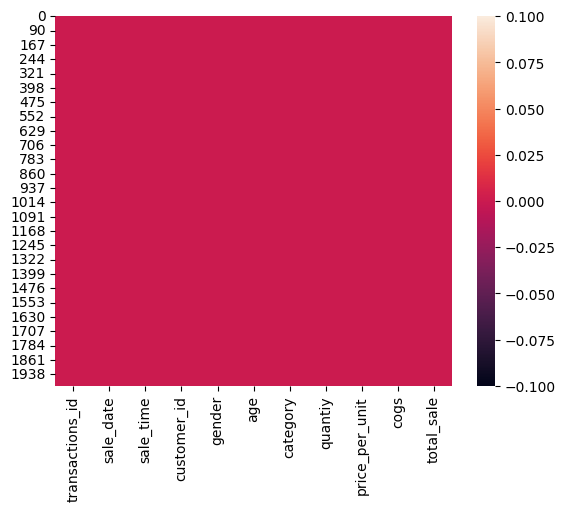

In [10]:
sns.heatmap(df.isna())
plt.show()

### 3.2 *Check for duplicates*

In [14]:
print('Any duplicate values :',df.duplicated().any())

Any duplicate values : False


### 3.3 ***Viewing the statistics of the numerical columns***

In [15]:
df.describe()

,transactions_id,customer_id,age,quantiy,price_per_unit,cogs,total_sale
count,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000
mean,1000.513337,66.284852,41.351283,2.51384,179.924509,95.081933,457.086059
std,578.274413,44.964430,13.662653,1.13277,189.441178,122.032280,560.862242
min,1.000000,1.000000,18.000000,1.00000,25.000000,6.250000,25.000000
25%,499.500000,24.000000,29.000000,1.00000,30.000000,13.000000,60.000000
50%,1001.000000,69.000000,42.000000,3.00000,50.000000,27.500000,150.000000
75%,1502.500000,102.000000,53.000000,4.00000,300.000000,147.000000,900.000000
max,2000.000000,155.000000,64.000000,4.00000,500.000000,620.000000,2000.000000


### 3.4 ***Handling Categorical/Ordinal Data***

In [18]:
print('Gender category :',df['gender'].unique())

Gender category : ['Male' 'Female']


In [19]:
print('Unique Customers :',df['customer_id'].nunique())

Unique Customers : 155


In [21]:
print('Unique Categories :',df['category'].unique())

Unique Categories : ['Clothing' 'Beauty' 'Electronics']


In [24]:
df['sale_date']=pd.to_datetime(df['sale_date'])

In [25]:
df['Year']=df['sale_date'].dt.year

In [26]:
df['Month']=df['sale_date'].dt.month

## 4. *Data Exploration*

In [53]:
print('Total Sales =',df['total_sale'].sum())

Total Sales = 908230.0


In [54]:
print('Total Cost of Sales =',df['cogs'].sum())

Total Cost of Sales = 188927.8


### *The total sales vs cost of goods sold reflects an unusually high profit margin.*

In [27]:
print('Total Sales :',df.groupby('Year')['total_sale'].sum().sort_values(ascending=False))

Total Sales : Year
2023    458895.0
2022    449335.0
Name: total_sale, dtype: float64


In [28]:
print('Total Cost of Goods Sold',df.groupby('Year')['cogs'].sum().sort_values(ascending=False))

Total Cost of Goods Sold Year
2022    95174.5
2023    93753.3
Name: cogs, dtype: float64


In [29]:
print('Gross Profit :',df.groupby('Year')['total_sale'].sum()-df.groupby('Year')['cogs'].sum())

Gross Profit = Year
2022    354160.5
2023    365141.7
dtype: float64


In [30]:
print('Gross Profit Percentage :',(df.groupby('Year')['total_sale'].sum()-df.groupby('Year')['cogs'].sum())/df.groupby('Year')['total_sale'].sum()*100)

Gross Profit Percentage = Year
2022    78.818810
2023    79.569771
dtype: float64


In [52]:
print('Yoy% Sales :',round((sales_per_yr-sales_per_yr.shift(1))*1.0/sales_per_yr.shift(1),2))

Yoy% Sales : Year
2022     NaN
2023    0.02
Name: total_sale, dtype: float64


### *Sales Value by grew by a modest 2% yoy.*

In [58]:
print('Total Quantity Sold =',round(df['quantiy'].sum()))

Total Quantity Sold = 4995


In [61]:
print('Quantity Per ',round(df.groupby(['Year'])['quantiy'].sum().sort_values(ascending=False)))

Quantity Per  Year
2023    2554.0
2022    2441.0
Name: quantiy, dtype: float64


In [70]:
qty=round(df.groupby(['Year'])['quantiy'].sum())

In [77]:
print('Yoy% Quantity',round((qty-qty.shift(1))*1.0/qty.shift(1),2))

Yoy% Quantity Year
2022     NaN
2023    0.05
Name: quantiy, dtype: float64


### ***Quantities sold grew by 5% from 2022.This was due to an increase in sales of clothing and electronics.***

In [78]:
print('Quantity Per category',df.groupby(['Year','category'])['quantiy'].sum().sort_values(ascending=False))

Quantity Per category Year  category   
2023  Clothing       937.0
      Electronics    858.0
2022  Clothing       843.0
      Electronics    824.0
      Beauty         774.0
2023  Beauty         759.0
Name: quantiy, dtype: float64


### *This displays the increase in clothing and electronics*

In [83]:
print('Quantities Sold by age cohort ',df.groupby(['Year','age'])['quantiy'].sum().sort_values(ascending=False).nlargest(3))

Sales by age cohort  Year  age 
2023  47.0    97.0
2022  43.0    89.0
2023  43.0    89.0
Name: quantiy, dtype: float64


In [84]:
print('Sales by age cohort ',df.groupby(['Year','age'])['total_sale'].sum().sort_values(ascending=False).nlargest(3))

Sales by age cohort  Year  age 
2022  19.0    23040.0
      26.0    19705.0
      43.0    19480.0
Name: total_sale, dtype: float64


### *The quantity sold by age cohort were far higher in the middle aged cohort,which might suggest that the younger age group are purchasing high priced items,since value wise they are far outsrip the middle aged cohort.This suggests that the younger age cohort is attracted to electronics far more than their older cohorts.The middle aged cohort would purchase more clothing and beauty products.*

In [93]:
print('Sales by  ',df.groupby('gender')['total_sale'].sum())

Sales by   gender
Female    463110.0
Male      445120.0
Name: total_sale, dtype: float64


In [96]:
print('Quantities by ',df.groupby('gender')['quantiy'].sum())

Quantities by  gender
Female    2573.0
Male      2422.0
Name: quantiy, dtype: float64


In [97]:
print('Quantities by ',df.groupby(['gender','category'])['quantiy'].sum())

Quantities by  gender  category   
Female  Beauty         829.0
        Clothing       879.0
        Electronics    865.0
Male    Beauty         704.0
        Clothing       901.0
        Electronics    817.0
Name: quantiy, dtype: float64


### *Women spend slightly more than their male counterparts but there arent any significant differences*

In [86]:
print('Total Cogs by category ',df.groupby(['Year','category'])['cogs'].sum().sort_values(ascending=False))

Total Cogs by category  Year  category   
2023  Electronics    35598.30
2022  Beauty         33131.25
2023  Clothing       33085.65
2022  Electronics    31079.15
      Clothing       30964.10
2023  Beauty         25069.35
Name: cogs, dtype: float64


In [87]:
print('Top 5 Customers by Quantity',df.groupby(['Year','customer_id'])['quantiy'].sum().nlargest(5))

Top 5 Customers Year  customer_id
2023  3              193.0
      1              170.0
      4              161.0
      5              145.0
      2              133.0
Name: quantiy, dtype: float64


In [89]:
print('Top 5 Customers Rand Value',df.groupby(['Year','customer_id'])['total_sale'].sum().nlargest(5))

Top 5 Customers Rand Value Year  customer_id
2023  3              35380.0
      5              28095.0
      1              27180.0
      4              23220.0
      2              21525.0
Name: total_sale, dtype: float64


In [90]:
print('Top 5 largest sales by year and month =',df.groupby(['Year','Month'])['total_sale'].sum().sort_values(ascending=False).nlargest(5))

Top 5 largest sales by year and month = Year  Month
2022  12       71880.0
2023  12       69145.0
2022  11       68915.0
      10       67735.0
2023  9        67560.0
Name: total_sale, dtype: float64


### *The festive period is the most busiest period judging by the sales of the largest 5 months.*